In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loading, splitting, and scaling complete.")

Data loading, splitting, and scaling complete.


In [5]:
# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['PRICE'] = y

# Display first few rows
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display basic statistics
print("\nDataset statistics:")
print(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Dataset statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.0

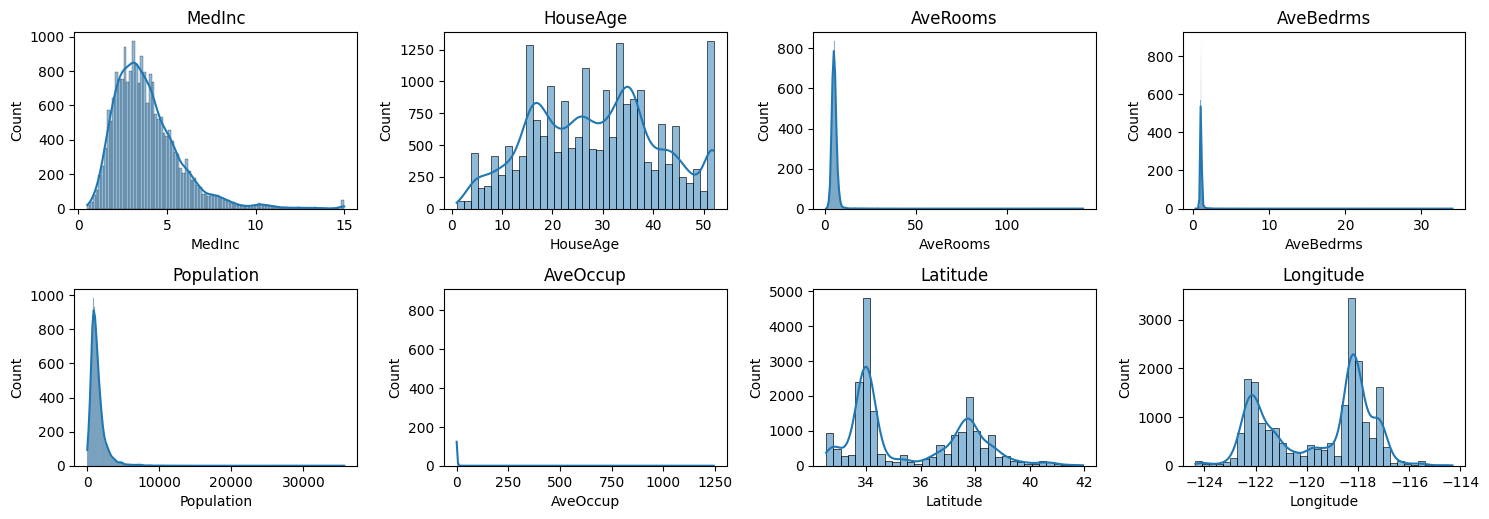

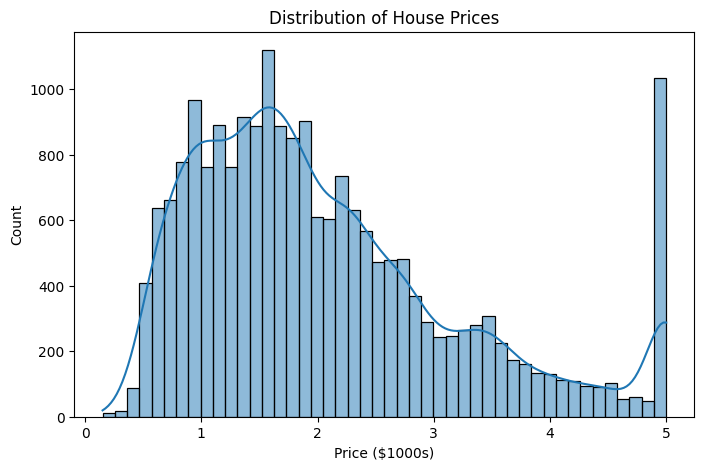

In [6]:
# Plot histograms for all features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Plot distribution of target variable (PRICE)
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($1000s)')
plt.show()

In [7]:
# Split features and target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 16512
Test set size: 4128


In [8]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Mean Squared Error: 0.56


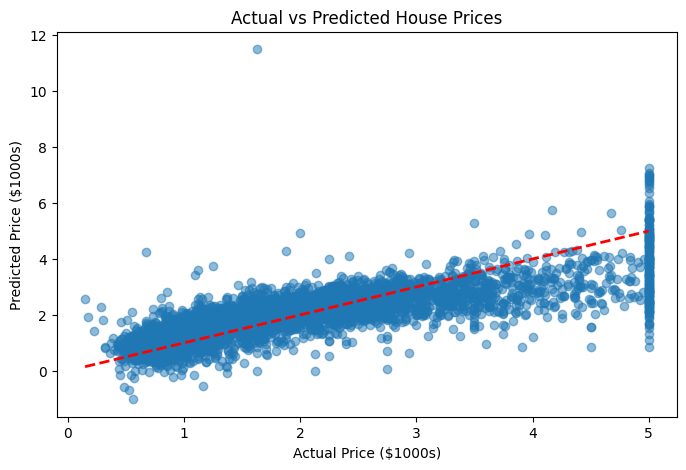

In [9]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [10]:
# Save evaluation results and feature coefficients
with open('housing_evaluation_results.txt', 'w') as f:
    f.write(f'Mean Squared Error: {mse:.2f}\n')
    f.write('\nFeature Coefficients:\n')
    for feature, coef in zip(feature_names, model.coef_):
        f.write(f'{feature}: {coef:.4f}\n')